In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
titanic = pd.read_csv("https://raw.githubusercontent.com/ppnp-remoto/14-datasets/master/titanic.csv")
#titanic.head() Traz um resumo dos primeiros resultados do DataFrame

# PERGUNTAS

    * Quantas pessoas tinham apartir de 50 anos?

    * Quantas pessoas eram menores de idade?

    * Quantos sobreviventes por sexo?


In [5]:
# Quantas pessoas tinha mais de 50 anos?

titanic[titanic.Age > 50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
...,...,...,...,...,...,...,...,...,...,...,...,...
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S


In [6]:
# Pode-se fazer querys por aqui também.

cinquentaMais = titanic.query("Age >= 50")
#cinquentaMais.PassengerId.count()

In [7]:
print(f"Haviam {titanic[titanic.Age >= 50].shape[0]} pessoas a partir de 50 anos abordo do Titanic.")

Haviam 74 pessoas a partir de 50 anos abordo do Titanic.


In [8]:
# Quantas pessoas eram menores de idade

menoresIdade = titanic.query("Age < 18")
#menoresIdade.PassengerId.count()

In [9]:
print(f"Haviam {titanic[ (titanic.Age < 18) & (titanic.Survived == 1) ].shape[0]} pessoas menores de idade sobreviventes à bordo do Titanic.")

Haviam 61 pessoas menores de idade sobreviventes à bordo do Titanic.


In [32]:
# Sobreviventes por sexo

mais50 = cinquentaMais[['PassengerId', 'Sex']].groupby('Sex', as_index=False).count()
# Renomear colunas com o método rename
mais50.rename(columns={"PassengerId": "Quantidade"}, inplace=True)

mais50


,Sex,Quantidade
0,female,22
1,male,52


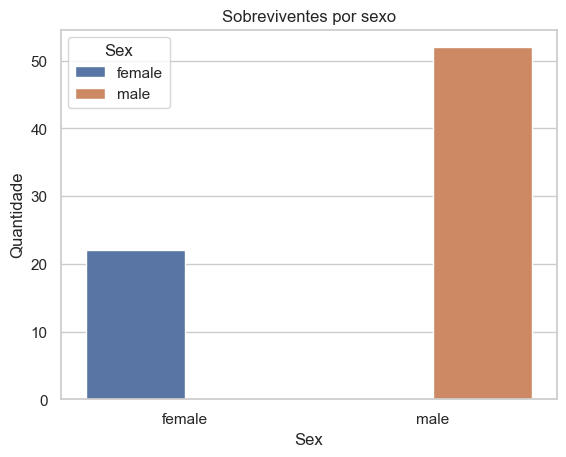

In [35]:
sns.set(style="whitegrid")
sns.barplot(x="Sex", y="Quantidade", hue = 'Sex', data=mais50)
plt.title("Sobreviventes por sexo")
plt.show()

# EXERCÍCIO

    * Quantas pessoas sobreviveram por classe?


In [62]:
# Quantas pessoas sobreviveram por classe?

survived = titanic.query('Survived == 1')
survivedPerClass = survived[ ["Pclass", "PassengerId"] ].groupby("Pclass", as_index=False).count()
survivedPerClass.rename(columns={"PassengerId": "Quantidade"}, inplace=True)

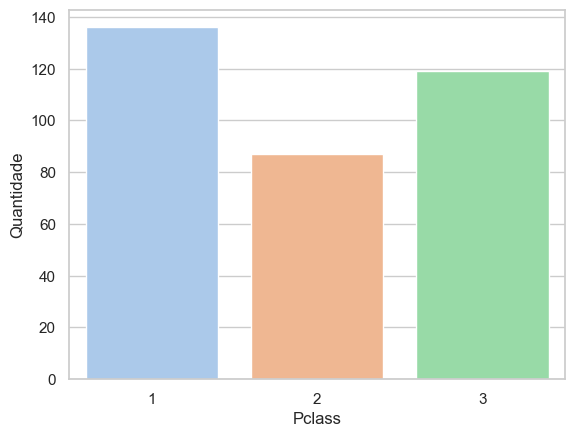

In [63]:
sns.barplot(x="Pclass", y="Quantidade", data=survivedPerClass)
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Exercício:

* Escolher uma base de dados no IBGE ou qualquer outro lugar
* Executar 3 diferentes consultas nesta base, e gerar um gráfico com pelo menos uma das consultas